In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats
from IPython.display import display

In [3]:
def fake_data(n, coeff, scale_error):
    x = np.random.randn(n)
    return x, x * coeff + np.random.random(n) * scale_error

In [4]:
n = 100
coeffs = [10, -10, 0.1, -0.1]
errors = [0, 5, 10, 50]

0 100 10 0


slope        10.0
intercept     0.0
r_value       1.0
p_value       0.0
std_err       0.0
Name: Run 1, dtype: float64

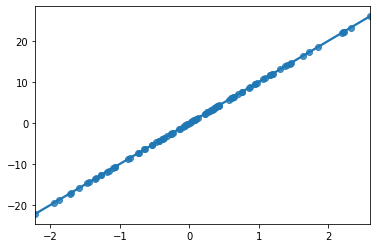

1 100 10 5


slope        1.006883e+01
intercept    2.541054e+00
r_value      9.862271e-01
p_value      2.121859e-78
std_err      1.705751e-01
Name: Run 2, dtype: float64

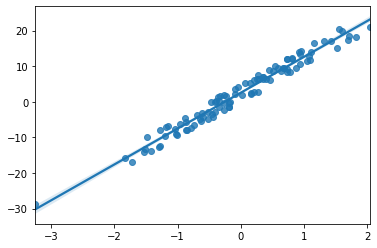

2 100 10 10


slope        9.984474e+00
intercept    4.955526e+00
r_value      9.580257e-01
p_value      5.607411e-55
std_err      3.018117e-01
Name: Run 3, dtype: float64

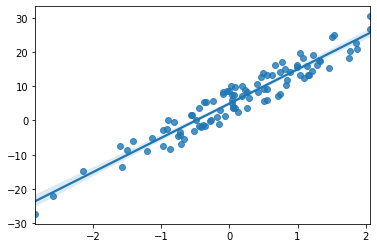

3 100 10 50


slope        7.536904e+00
intercept    2.538343e+01
r_value      4.924700e-01
p_value      1.946173e-07
std_err      1.345500e+00
Name: Run 4, dtype: float64

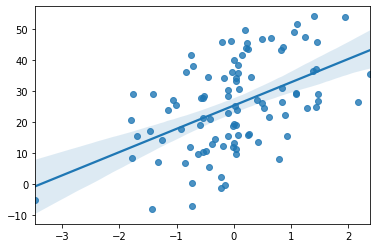

4 100 -10 0


slope       -1.000000e+01
intercept    4.440892e-16
r_value     -1.000000e+00
p_value      0.000000e+00
std_err      0.000000e+00
Name: Run 5, dtype: float64

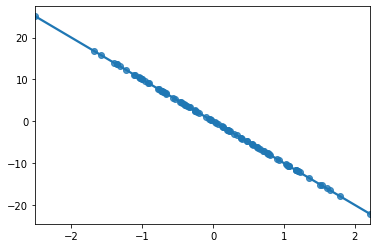

5 100 -10 5


slope       -9.859769e+00
intercept    2.576564e+00
r_value     -9.873668e-01
p_value      3.165610e-80
std_err      1.598348e-01
Name: Run 6, dtype: float64

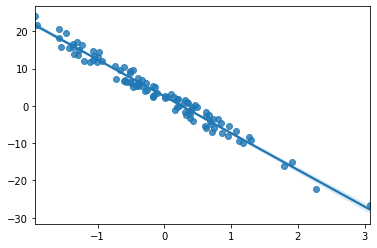

6 100 -10 10


slope       -9.876179e+00
intercept    4.546295e+00
r_value     -9.496076e-01
p_value      3.552349e-51
std_err      3.292972e-01
Name: Run 7, dtype: float64

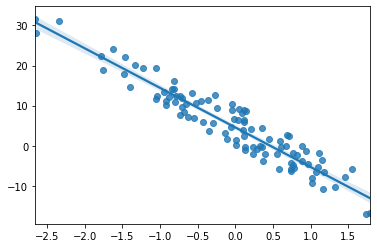

7 100 -10 50


slope       -9.989528e+00
intercept    2.591503e+01
r_value     -6.350839e-01
p_value      1.279674e-12
std_err      1.227347e+00
Name: Run 8, dtype: float64

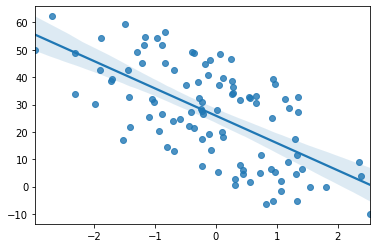

8 100 0.1 0


slope        1.000000e-01
intercept    4.336809e-18
r_value      1.000000e+00
p_value      0.000000e+00
std_err      3.010489e-10
Name: Run 9, dtype: float64

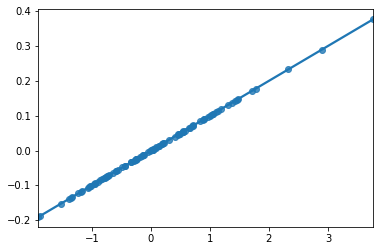

9 100 0.1 5


slope        0.338588
intercept    2.390523
r_value      0.245944
p_value      0.013643
std_err      0.134795
Name: Run 10, dtype: float64

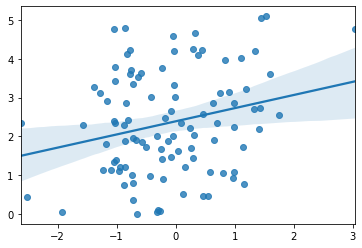

10 100 0.1 10


slope        0.064135
intercept    5.137810
r_value      0.022460
p_value      0.824467
std_err      0.288380
Name: Run 11, dtype: float64

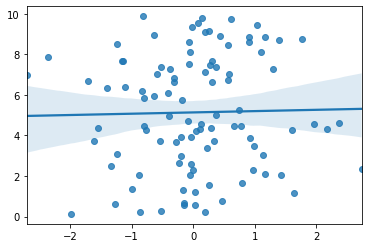

11 100 0.1 50


slope        -0.265716
intercept    24.767195
r_value      -0.021416
p_value       0.832506
std_err       1.253062
Name: Run 12, dtype: float64

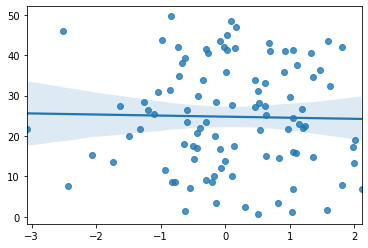

12 100 -0.1 0


slope       -1.000000e-01
intercept   -5.204170e-18
r_value     -1.000000e+00
p_value      0.000000e+00
std_err      3.010489e-10
Name: Run 13, dtype: float64

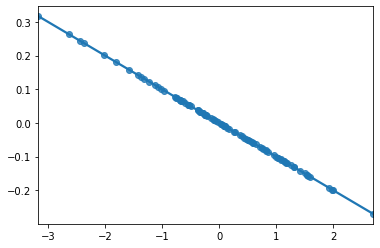

13 100 -0.1 5


slope       -0.141837
intercept    2.330583
r_value     -0.089953
p_value      0.373450
std_err      0.158633
Name: Run 14, dtype: float64

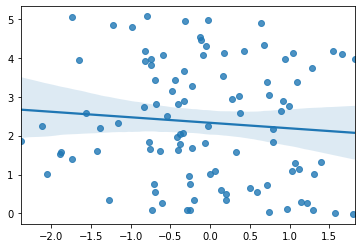

14 100 -0.1 10


slope        0.120874
intercept    5.658887
r_value      0.038750
p_value      0.701892
std_err      0.314866
Name: Run 15, dtype: float64

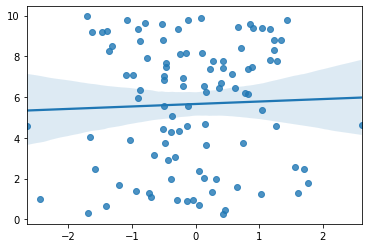

15 100 -0.1 50


slope         0.236470
intercept    23.683839
r_value       0.015881
p_value       0.875381
std_err       1.503909
Name: Run 16, dtype: float64

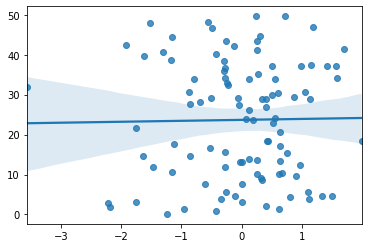

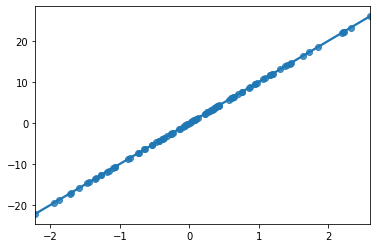

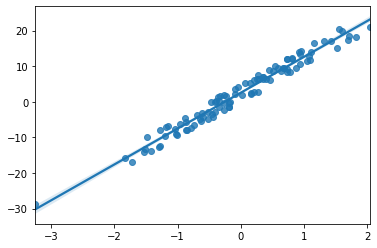

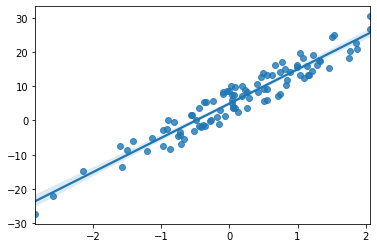

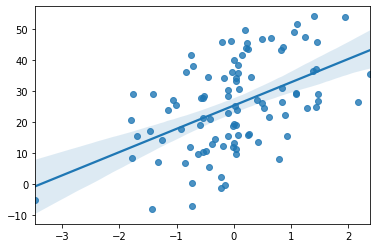

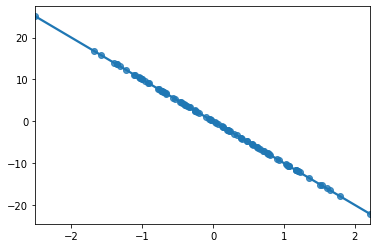

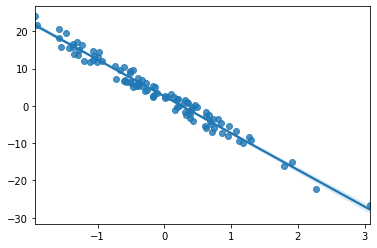

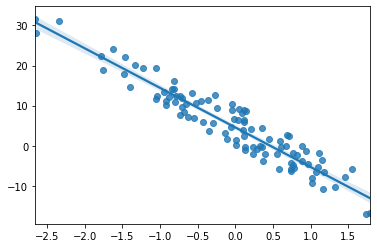

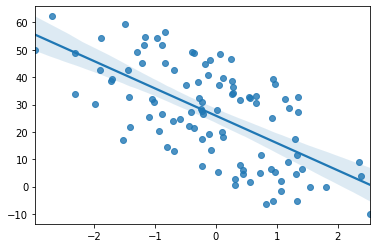

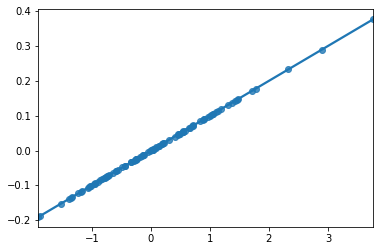

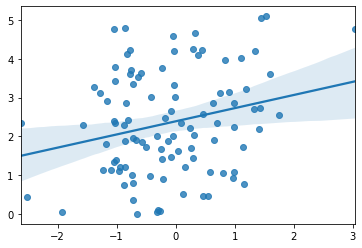

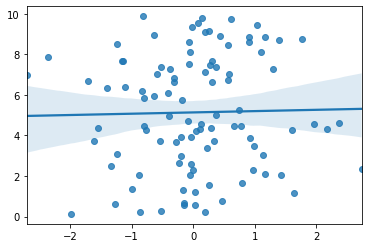

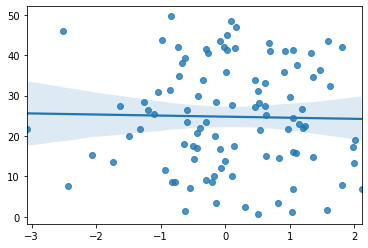

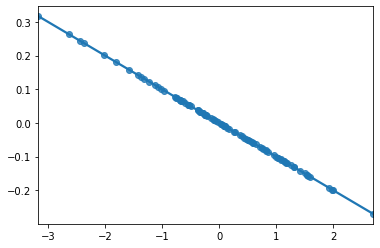

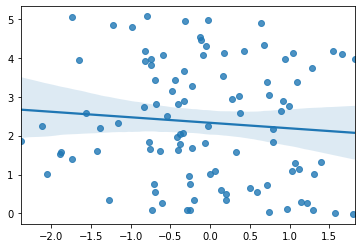

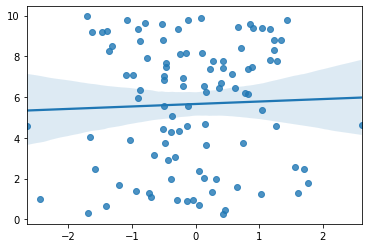

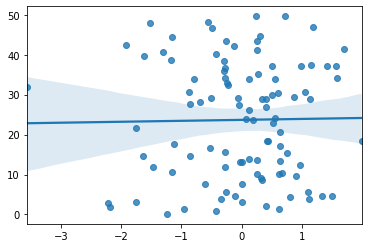

In [6]:
import itertools

dfs = []

for idx, (coeff, error) in enumerate(itertools.product(coeffs, errors)):
    print(idx, n, coeff, error)
    x, y = fake_data(n, coeff, error)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    ser = pd.Series(
        {
            "slope": slope,
            "intercept": intercept,
            "r_value": r_value,
            "p_value": p_value,
            "std_err": std_err,
        }
    ).rename("Run %d" % (idx + 1))
    ser.to_csv("data/run_%d.csv" % (idx + 1))
    dfs.append(ser)
    fig = plt.figure()
    g = sns.regplot(x, y)
    fig.savefig("data/run_%d.png" % (idx + 1))
    display(ser)
    display(fig)

In [9]:
df = pd.concat(dfs, axis=1)
df

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,Run 11,Run 12,Run 13,Run 14,Run 15,Run 16
slope,10.0,1.006883e+01,9.984474e+00,7.536904e+00,-1.000000e+01,-9.859769e+00,-9.876179e+00,-9.989528e+00,1.000000e-01,0.338588,0.064135,-0.265716,-1.000000e-01,-0.141837,0.120874,0.236470
intercept,0.0,2.541054e+00,4.955526e+00,2.538343e+01,4.440892e-16,2.576564e+00,4.546295e+00,2.591503e+01,4.336809e-18,2.390523,5.137810,24.767195,-5.204170e-18,2.330583,5.658887,23.683839
r_value,1.0,9.862271e-01,9.580257e-01,4.924700e-01,-1.000000e+00,-9.873668e-01,-9.496076e-01,-6.350839e-01,1.000000e+00,0.245944,0.022460,-0.021416,-1.000000e+00,-0.089953,0.038750,0.015881
p_value,0.0,2.121859e-78,5.607411e-55,1.946173e-07,0.000000e+00,3.165610e-80,3.552349e-51,1.279674e-12,0.000000e+00,0.013643,0.824467,0.832506,0.000000e+00,0.373450,0.701892,0.875381
std_err,0.0,1.705751e-01,3.018117e-01,1.345500e+00,0.000000e+00,1.598348e-01,3.292972e-01,1.227347e+00,3.010489e-10,0.134795,0.288380,1.253062,3.010489e-10,0.158633,0.314866,1.503909


In [10]:
df.to_csv("data/run_summary.tsv", sep="\t")